# **Exploratory Data Analysis (EDA):**

## **Import Important Libraries and Modules:**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt

## **Export Target Dataframe:**

In [2]:
df = pd.read_csv('D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\Hotels Exploratory Data Analysis (EDA) Project\\Hotels_Exploratory_Data_Analysis_EDA_Project\\Dataset\\cleaned_formatted_hotels_df.csv')

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118897 entries, 0 to 118896
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  object        
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

Text(0, 0.5, 'Percent %')

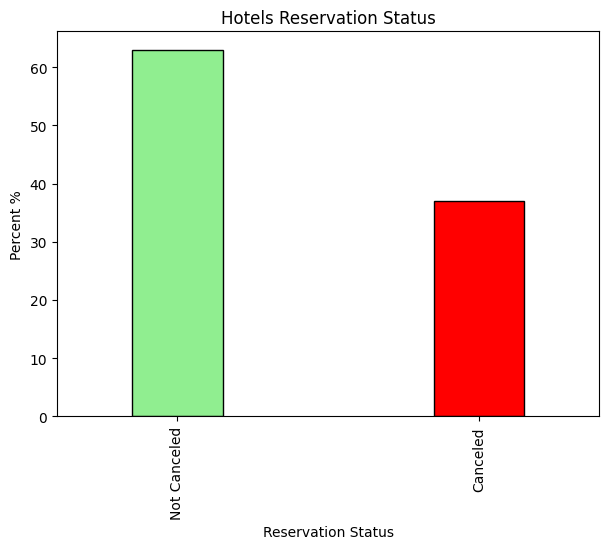

In [19]:
plt.figure(figsize=(7,5))
round(df['is_canceled'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    color=['lightgreen', 'red'],
    width=0.3,
    edgecolor='k'
)
plt.title('Hotels Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Percent %')

In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'month_number', 'year_number',
       'reservation_status_date_month_year'],
      dtype='object')

In [22]:
df.pivot_table(
    index=['hotel'],
    columns=['is_canceled'],
    aggfunc='size'

)

is_canceled,Canceled,Not Canceled
hotel,,
City Hotel,33075,46226
Resort Hotel,11077,28519


Text(0, 0.5, 'Frequency')

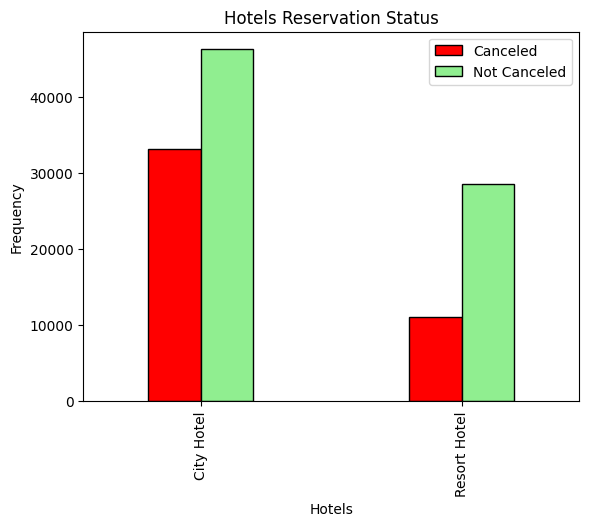

In [6]:
df.pivot_table(
    index=df['hotel'],
    columns=df['is_canceled'],
    aggfunc='size'
).plot(
    kind='bar',
    color=['red', 'lightgreen'],
    width=0.4,
    edgecolor='k'
    )
plt.legend(title='')
plt.title('Hotels Reservation Status')
plt.xlabel('Hotels')
plt.ylabel('Frequency')

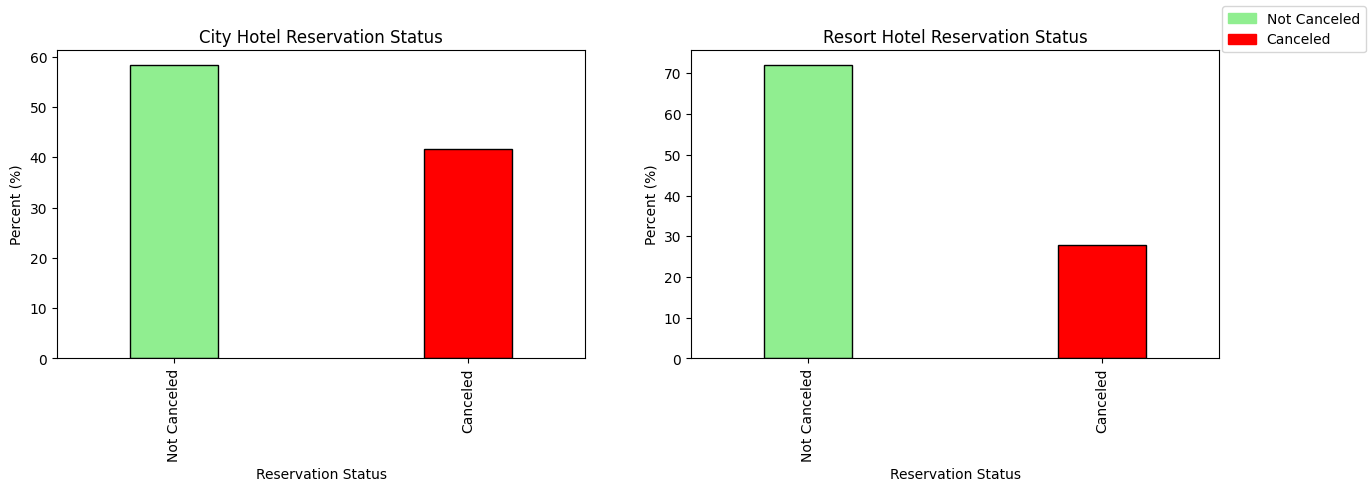

In [7]:
hotels = ['City Hotel', 'Resort Hotel']

fig, ax = plt.subplots(1,2)
for index, hotel in enumerate(hotels):
    ((df[df['hotel'] == hotel])['is_canceled'].value_counts(normalize=True) * 100).plot(
        kind='bar',
        color=['lightgreen', 'red'],
        edgecolor='k',
        width=0.3,
        figsize=(15,4),
        ax=ax[index]
    )
    ax[index].set_title(f"{hotel} Reservation Status")
    ax[index].set_xlabel('Reservation Status')
    ax[index].set_ylabel('Percent (%)')
    
green_patch = mpatches.Patch(color='lightgreen', label='Not Canceled')
red_patch = mpatches.Patch(color='red', label='Canceled')
fig.legend(handles=[green_patch, red_patch], labels=['Not Canceled', 'Canceled'])


In [8]:
df['month_number'] = df['reservation_status_date'].dt.month
df['year_number'] = df['reservation_status_date'].dt.year
df['reservation_status_date_month_year'] = df['reservation_status_date'].dt.strftime('%b-%Y')

In [9]:
resort_hotel_df = df[df['hotel'] == 'Resort Hotel']
city_hotel_df = df[df['hotel'] == 'City Hotel'] 

In [10]:
resort_hotel_month_year_group = resort_hotel_df.groupby(
    by=['reservation_status_date_month_year', 'month_number', 'year_number']
).agg(
    average_daily_rate=('adr', 'mean')
).sort_values(by=['year_number', 'month_number']).reset_index()

In [11]:
city_hotel_month_year_group = city_hotel_df.groupby(
    by=['reservation_status_date_month_year', 'month_number', 'year_number']
).agg(
    average_daily_rate=('adr', 'mean')
).sort_values(by=['year_number', 'month_number']).reset_index()

In [12]:
average_daily_rate = resort_hotel_month_year_group.merge(
    city_hotel_month_year_group,
    on='reservation_status_date_month_year',
    how='outer',
    suffixes=("_resort", "_city")
).sort_values(
    by=['year_number_resort', 'month_number_resort']
).drop(
    columns=['month_number_resort', 'year_number_resort', 'month_number_city', 'year_number_city']
).dropna()

In [13]:
average_daily_rate['reservation_status_date_month_year'] = pd.to_datetime(average_daily_rate['reservation_status_date_month_year'], format='%b-%Y')

In [16]:
average_daily_rate

,average_daily_rate_resort,average_daily_rate_city
reservation_status_date_month_year,,
2015-01-01,41.738767,62.066085
2015-02-01,120.876364,84.977273
2015-03-01,75.592903,93.156087
2015-04-01,102.262683,76.768929
2015-05-01,119.036134,67.642372
2015-06-01,99.246685,78.439530
2015-07-01,120.347790,76.627932
2015-08-01,146.652683,90.548695
2015-09-01,93.091905,103.626238


In [14]:
average_daily_rate = average_daily_rate.set_index(keys='reservation_status_date_month_year')

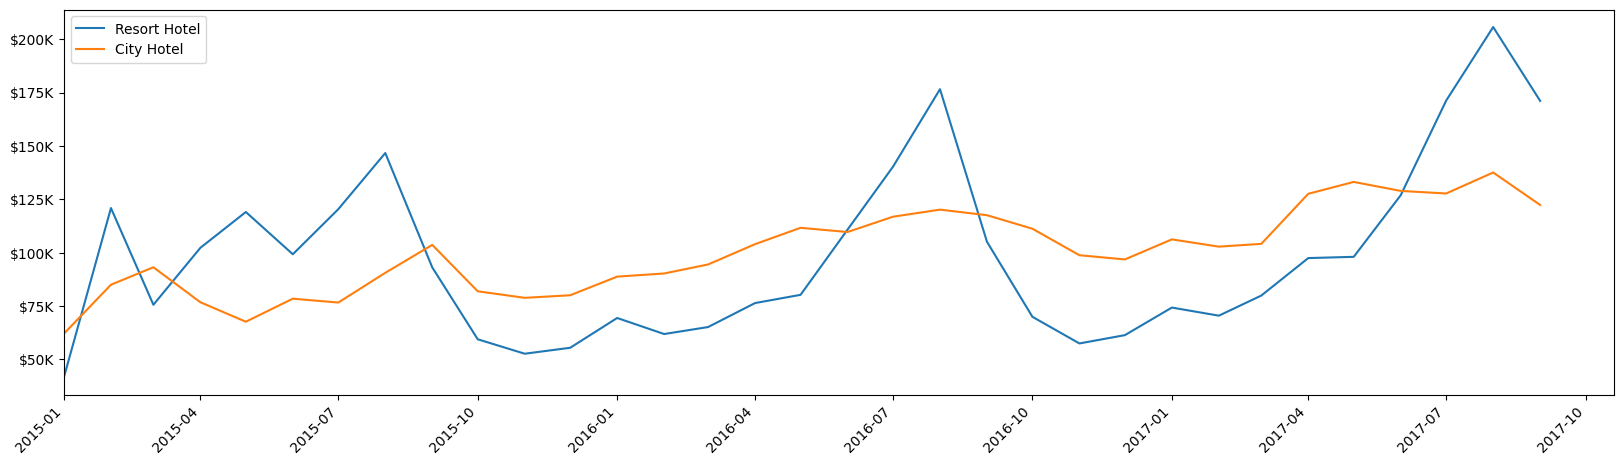

In [15]:
plt.figure(figsize=(20,5))
for column in average_daily_rate.columns:
    plt.plot(
        average_daily_rate.index,
        average_daily_rate[column]
    )
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Resort Hotel', 'City Hotel'], loc='best')
plt.xlim(left=average_daily_rate.index.min())
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: (f"${int(y)}K")))